In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Preview the data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Basic info and shape
df.shape
df.info()

# Check for missing values
df.isnull().sum()

# Unique values in each column
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [3]:
# Overall attrition rate
df['Attrition'].value_counts(normalize=True) * 100

# Attrition by department
df.groupby('Department')['Attrition'].value_counts(normalize=True)

# Attrition vs Overtime
df.groupby('OverTime')['Attrition'].value_counts(normalize=True)

# Job Satisfaction vs Attrition
df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True)

JobSatisfaction  Attrition
1                No           0.771626
                 Yes          0.228374
2                No           0.835714
                 Yes          0.164286
3                No           0.834842
                 Yes          0.165158
4                No           0.886710
                 Yes          0.113290
Name: proportion, dtype: float64

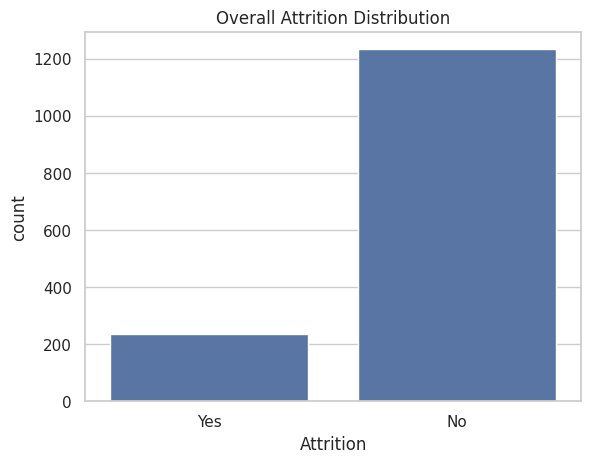

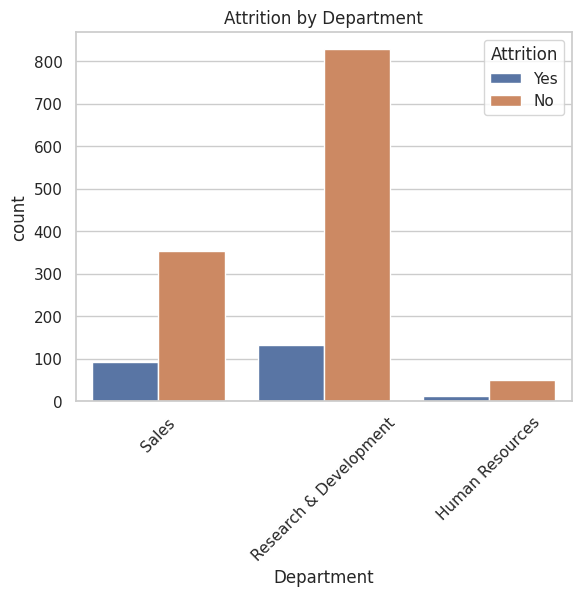

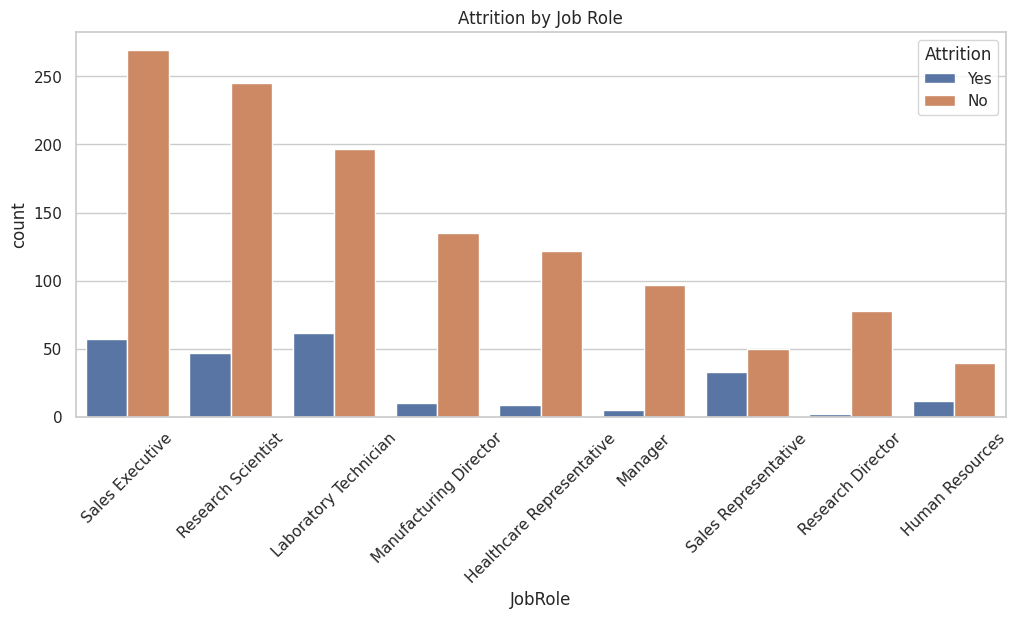

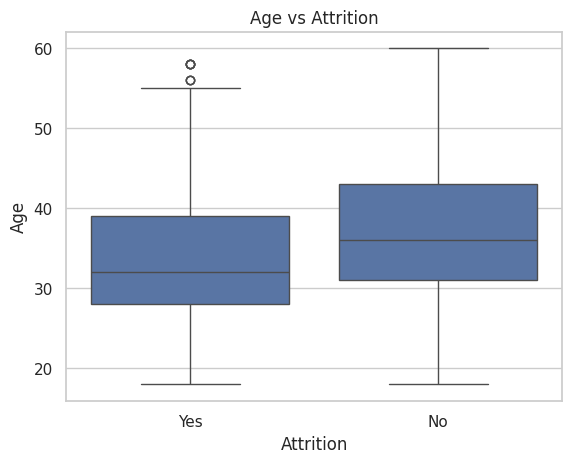

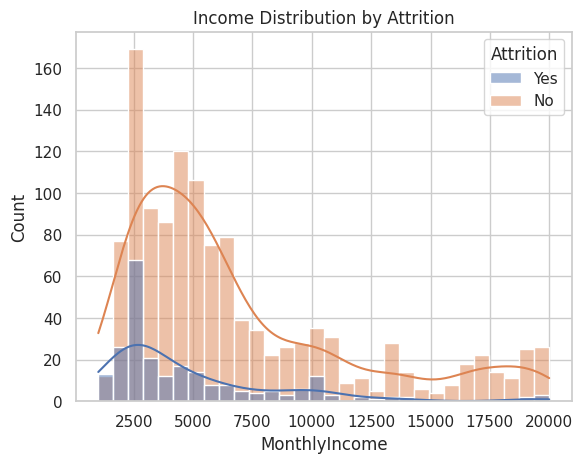

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title('Overall Attrition Distribution')
plt.show()

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Attrition by Job Role
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

# Age vs Attrition
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Age vs Attrition')
plt.show()

# Monthly Income Distribution
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, bins=30)
plt.title('Income Distribution by Attrition')
plt.show()


## 🔍 Summary of Insights:
- Overall attrition rate is X%.
- Highest attrition is in [Department/Job Role].
- Employees with Overtime are Y% more likely to leave.
- Attrition is higher in employees with lower job satisfaction and longer distance from home.
